In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#線性回歸
from sklearn import linear_model
#多項性回歸
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#資料集
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
#創建100個樣本點，1個特徵
X,y=make_regression(n_samples=100,n_features=1,noise=20)

In [3]:
X

array([[ 1.08074999],
       [ 1.42390367],
       [-0.27469599],
       [ 2.30392923],
       [-1.04767426],
       [-1.07106776],
       [ 1.3604427 ],
       [-0.48613484],
       [-0.06536872],
       [ 1.32206191],
       [-1.10429442],
       [ 1.06035985],
       [-0.20721733],
       [ 0.93012452],
       [-0.76312833],
       [-2.11620213],
       [-0.73228971],
       [-0.00406336],
       [ 0.7635587 ],
       [-0.19576991],
       [-0.26612622],
       [ 0.27663488],
       [-0.48640979],
       [ 0.5406    ],
       [-0.68041705],
       [-0.84950815],
       [-1.17877243],
       [-3.47531473],
       [ 0.72310602],
       [-0.20126878],
       [-0.02676713],
       [-0.68664981],
       [-0.78409072],
       [ 0.76766708],
       [-2.45583541],
       [-0.83604663],
       [ 0.26510208],
       [-1.47974974],
       [ 0.50868316],
       [-1.85628797],
       [ 0.29148528],
       [-0.77219977],
       [ 1.66146711],
       [-0.41150245],
       [ 0.28877138],
       [ 1

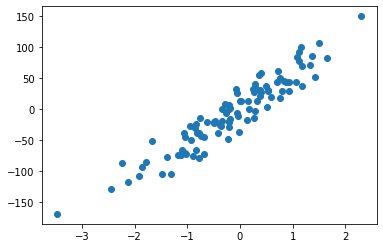

In [4]:
plt.scatter(X,y)

In [5]:
X.shape

(100, 1)

In [6]:
y.shape

(100,)

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# Simple Linera Regerssion

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

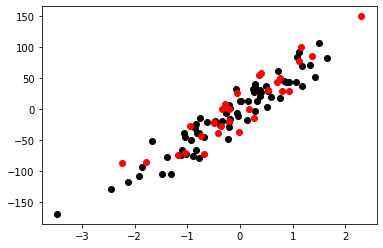

In [9]:
#觀察模型，資料集與測試集部分
plt.scatter(X_train , y_train, color='black')
plt.scatter(X_test , y_test , color='red')
plt.show()

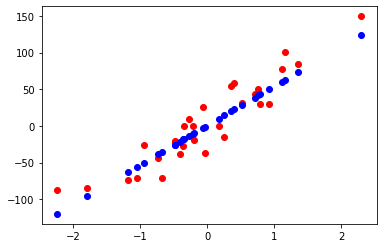

In [10]:
#模型表現觀測
plt.scatter(X_test , y_test , color = 'red')
plt.scatter(X_test , regr.predict(X_test) , color = 'blue')
plt.show()

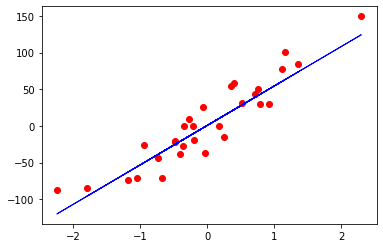

In [11]:
plt.scatter(X_test , y_test , color = 'red')
plt.plot(X_test , regr.predict(X_test),color = 'blue',linewidth = 1)
plt.show()

In [12]:
w_0=regr.intercept_#截距
w_1=regr.coef_#斜率
print('Intercept:',w_0)
print('Cofficient:',w_1)

Intercept: 0.4837609072725577
Cofficient: [53.70896828]


In [13]:
#overfitting 情況：訓練達100%測試只有50%
regr.score(X_train,y_train)

0.9024289015122277

In [14]:
regr.score(X_test,y_test)

0.8598535011086375

# 自行做一個線性回歸model Gradient Decent

In [15]:
#Parameters參數
alpha=0.001#learning rate
repeats=100

#Initializing variables
w0 = 0
w1 = 0
errors = []
points = []

In [16]:
for j in range(repeats):
    error_sum = 0
    squared_error_sum = 0
    error_sum_x = 0
    for i in range(len(X_train)):
        predict = w0 + (X_train[i]*w1)
        squared_error_sum = squared_error_sum+(y_train[i]-predict)**2
        error_sum = error_sum + y_train[i]-predict
        error_sum_x = error_sum_x + (y_train[i]-predict)*X_train[i]
    w0 = w0+(alpha*error_sum)
    w1 = w1+(alpha*error_sum_x)
    errors.append(squared_error_sum/len(X_train))
print('w0 : %2f'%w0)
print('w1 : %2f'%w1)

w0 : 0.414017
w1 : 53.638547


In [17]:
predicts = []
mean_error = 0
for i in range(len(X_test)):
    predict=w0+(X_test[i]*w1)
    predicts.append(predict)

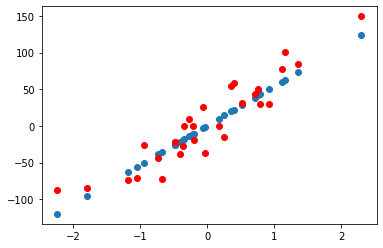

In [18]:
plt.scatter(X_test,predicts)
plt.scatter(X_test,y_test,color='red')
plt.show()

# Polynomial Regression多項式回歸

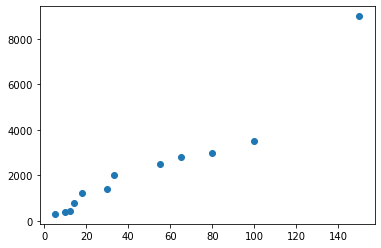

In [19]:
#建立資料
size = [5,10,12,14,18,30,33,55,65,80,100,150]
price = [300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]
plt.scatter(size,price)
plt.show()

In [20]:
#資料整理
series_dict={'X':size,'y':price}
df = pd.DataFrame(series_dict)
X = df[['X']]
y = df[['y']]

In [21]:
#建立模型，PolynomialFeatures(3)，3 = 幾次方
model = make_pipeline(PolynomialFeatures(3) , linear_model.LinearRegression())
model.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

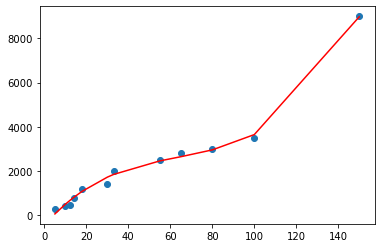

In [22]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color = 'red')

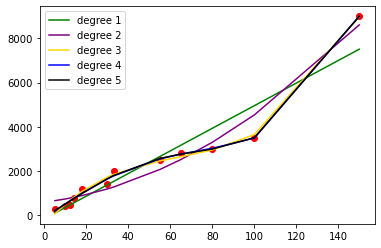

In [23]:
#不確定該用多少次方時可以下方方法畫出多條次方預測線。
scores = []
colors = ['green','purple','gold','blue','black']
plt.scatter(X,y,c='red')
for count , degree in enumerate([1,2,3,4,5]):
    model = make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
    model.fit(X,y)
    scores.append(model.score(X,y))
    plt.plot(X,model.predict(X),color = colors[count],label='degree %d' %degree)
    
plt.legend(loc=2)
plt.show()

In [24]:
#觀看準確度
scores

[0.9059983910519219,
 0.9585314218103534,
 0.9951555665160685,
 0.9966093112780661,
 0.9966678106695324]

# Multivariable Regression 多元回歸

In [25]:
X,y = make_regression(n_samples = 100,n_features = 5,noise = 50)

In [26]:
X

array([[ 1.1377132 , -1.42317102,  1.02610072, -1.3267237 ,  0.3132264 ],
       [ 1.28340807, -0.86034228,  2.18580418, -0.95316709,  0.64890819],
       [-1.20778312,  1.34028374, -0.64096686,  0.78888528, -0.84018912],
       [ 0.70234101,  0.60314137,  1.18049495,  0.29911835, -0.54900681],
       [-0.46149227, -0.62544881, -1.03055863, -0.96824457,  0.90745285],
       [ 0.88640937,  2.12711633, -1.58436677,  1.03705186, -0.0526182 ],
       [ 1.42651765,  0.12830471, -1.25408075, -0.46594653, -0.08857592],
       [-1.73301924, -0.25757509, -1.00690706,  1.09406044, -1.72691681],
       [-1.32123415,  1.48944164, -0.69680428,  1.17092161,  2.06404398],
       [-0.67618306,  0.54468516, -0.84956505,  1.11138911,  0.28930945],
       [-1.02550727,  0.62132207, -1.16887478,  0.136194  , -1.92716869],
       [ 1.47390175, -0.16400674,  0.46490477,  1.36740232,  0.89776859],
       [-0.32610742, -0.56985187, -0.12805942,  1.19547153, -2.40223047],
       [-1.22934966,  0.93864247,  0.1

In [27]:
y

array([  24.90744529,  191.96136993,  -15.79499553,  226.72222383,
       -177.96033322,   -2.13099175,  -31.61095917, -174.08096898,
        -46.00317916,  -81.09475225, -220.87853263,  202.3565491 ,
         28.05932714,  -10.40868912, -116.56713119,  143.30021586,
         46.45487425,  -34.39176218,  -97.53345816,  -56.44430569,
        -10.1431775 , -161.32247204,   -5.30691622, -374.36283688,
         12.80639723,  132.76847968,  188.14062337,  186.85698894,
        169.86052182, -350.77962512,   17.86240864,  117.86467474,
       -158.76646976,  -44.33357848,  -76.5901582 ,  166.36092836,
         22.88275501,   81.59029182,    3.42784286,  141.24499668,
          1.86798883,   -3.38695865,  158.51363063, -219.14440319,
       -115.38114625,   17.80220069,   -0.41600359, -132.40284329,
         36.65223638,   55.0226551 , -144.19435037, -144.08784393,
         -0.81552793,   91.17561725,  -14.30659149, -132.28959813,
        -55.30777726,  112.54151798,   16.0326248 ,  -11.77625

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [30]:
regr.intercept_

-0.5702523996508415

In [31]:
regr.coef_

array([74.02058579, 42.5992326 , 68.14591822, 33.57687698, -5.96112997])

In [32]:
regr.score(X_train,y_train)

0.8799204010795927

In [33]:
#建立資料
#房子大小
size = [5,10,12,14,18,30,33,35,65,80,100,150]
#與市中心距離
distance = [50,20,70,100,200,150,30,50,70,35,40,20]
#房價
price = [300,400,450,800,1200,1400,2000,2500,2800,3000,3500,9000]

In [34]:
#資料處理
series_dict = {'X1' : size,'X2' : distance,'y' : price}
df = pd.DataFrame(series_dict)
X = df[['X1','X2']]
y = df[['y']]

In [35]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [36]:
regr.score(X,y)

0.8960198847849856

In [37]:
regr.intercept_

array([-125.27687365])

In [38]:
regr.coef_

array([[51.11876519,  0.76139413]])

# To Avoid Overfitting
## 1.Lasso Regression
## 2.Ridge Regression

In [39]:
X,y = make_regression(n_samples = 1000,n_features = 10,noise = 10)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [41]:
#一般邏輯回歸與多元式回歸
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [42]:
print('Training Score: ' , regr.score(X_train , y_train))
print('Training Score: ' , regr.score(X_test , y_test))

Training Score:  0.9960501828568433
Training Score:  0.9964354520756878


In [43]:
#Lasso，alpha = 懲罰項
clf_lasso = linear_model.Lasso(alpha = 0.5)
clf_lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [44]:
print('Training Score: ' , clf_lasso.score(X_train , y_train))
print('Training Score: ' , clf_lasso.score(X_test , y_test))

Training Score:  0.9959595553947671
Training Score:  0.9963451516374735


In [45]:
#ridge
clf_ridge = linear_model.Ridge(alpha = 0.5)
clf_ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [46]:
print('Training Score: ' , clf_ridge.score(X_train , y_train))
print('Training Score: ' , clf_ridge.score(X_test , y_test))

Training Score:  0.996049662832725
Training Score:  0.9964408099670145


In [47]:
#多項式回歸
model = make_pipeline(PolynomialFeatures(4),linear_model.Ridge())
model.fit(X,y)
model.score(X,y)

0.9997399605157551